In [1]:
import matplotlib.pyplot as plt    #data vizualization
import tensorflow as tf            #for deep learning analysis
import pandas as pd                #data manupulation
import numpy as np                 #for mathematical operations
import cv2                         #open cv to process image data
import os                          

In [23]:
#importing the extracted data
train_data = pd.read_csv("train.csv")          
test_data = pd.read_csv("test.csv")

### Train data

In [8]:
train_data.drop('Unnamed: 0',axis=1,inplace=True)
train_data.head()

,video_name,tag
0,train/Dance/Dance-1.mp4,Dance
1,train/Dance/Dance-10.mp4,Dance
2,train/Dance/Dance-11.mp4,Dance
3,train/Dance/Dance-12.mp4,Dance
4,train/Dance/Dance-13.mp4,Dance


In [9]:
# to convert train data videos into images
full_frame=[]
for i,j in enumerate(train_data["video_name"]):
    cap = cv2.VideoCapture(j)
    frames = []
    k=0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame,(256,256))
        frame = frame[:, :, [2, 1, 0]]
        frames.append(frame)
        k+=1
        if k==200:
            break
    full_frame.append(frames)
    cap.release()
    print(i,end=" ")
    

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 

In [10]:
train_data["image"]=full_frame

In [11]:
train_data.to_csv("train_data.csv")

In [12]:
X=train_data["image"]

In [13]:
y=train_data["tag"]

In [14]:
X[0][50].shape

(256, 256, 3)

### Test data

In [24]:
# to convert test data videos into images
test_full_frame=[]
for i,j in enumerate(test_data["video_name"]):
    cap = cv2.VideoCapture(j)
    test_frames = []
    k=0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame,(256,256))
        frame = frame[:, :, [2, 1, 0]]
        test_frames.append(frame)
        k+=1
        if k==200:
            break
    test_full_frame.append(test_frames)
    cap.release()
    print(i,end=" ")
    

0 1 2 3 4 5 6 7 8 9 

In [25]:
len(test_data)

10

In [28]:
test_data["image"]=test_full_frame

In [29]:
X_test=test_data["image"]
y_test=test_data["tag"]

In [30]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten

In [31]:
feature_extractor = VGG16(weights="imagenet",include_top=False,pooling="max",input_shape=(256, 256, 3))
vgg_features = Model(inputs=feature_extractor.input, outputs=Flatten()(feature_extractor.layers[-1].output))

In [91]:
from tensorflow.keras.layers import Input, GRU, Dense

input_sequence = Input(shape=(200,512))  # Define input shape based on your data
gru_layer = GRU(units=200)(input_sequence)  # Define GRU layer
output = Dense(1, activation='sigmoid')(gru_layer)  # Define an output layer

gru_model = Model(inputs=input_sequence, outputs=output)

In [96]:
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
vgg_features.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [77]:
gru_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 512)]        0         
                                                                 
 gru_1 (GRU)                 (None, 16)                25440     
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 25474 (99.51 KB)
Trainable params: 25474 (99.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
def vgg_ext():
    all_feature=[]
    for i in range(len(X)):
        feature=[]
        print(i)
        for j in range(len(X[i])):
            c=preprocess_input(X[i][j])
            feature.append(vgg_features.predict(np.expand_dims(c,axis=0)))
        all_feature.append(feature)
    return all_feature

In [37]:
train_features=vgg_ext()

0
1/1 [==============================] - 0s 365ms/step
1
1/1 [==============================] - 0s 365ms/step


1/1 [==============================] - 0s 424ms/step
2
1/1 [==============================] - 0s 329ms/step
3
1/1 [==============================] - 0s 365ms/step


1/1 [==============================] - 0s 365ms/step
4
1/1 [==============================] - 0s 372ms/step
5
1/1 [==============================] - 0s 438ms/step


1/1 [==============================] - 0s 372ms/step
6
1/1 [==============================] - 0s 394ms/step


1/1 [==============================] - 0s 376ms/step
7
1/1 [==============================] - 0s 427ms/step
8
1/1 [==============================] - 0s 394ms/step


1/1 [==============================] - 1s 514ms/step
9
1/1 [==============================] - 0s 403ms/step


1/1 [==============================] - 0s 401ms/step
10
1/1 [==============================] - 0s 406ms/step
11
1/1 [==============================] - 0s 409ms/step


1/1 [==============================] - 0s 414ms/step
12
1/1 [==============================] - 0s 410ms/step


1/1 [==============================] - 0s 421ms/step
13
1/1 [==============================] - 0s 430ms/step
14
1/1 [==============================] - 0s 441ms/step


1/1 [==============================] - 0s 465ms/step
15
1/1 [==============================] - 0s 470ms/step
16
1/1 [==============================] - 0s 473ms/step


1/1 [==============================] - 1s 672ms/step
17
1/1 [==============================] - 1s 693ms/step


1/1 [==============================] - 1s 733ms/step
18
1/1 [==============================] - 1s 806ms/step
19
1/1 [==============================] - 1s 724ms/step


1/1 [==============================] - 1s 716ms/step
20
1/1 [==============================] - 1s 701ms/step


1/1 [==============================] - 1s 703ms/step
21
1/1 [==============================] - 1s 791ms/step
22
1/1 [==============================] - 1s 774ms/step


1/1 [==============================] - 1s 812ms/step
23
1/1 [==============================] - 1s 880ms/step


1/1 [==============================] - 1s 878ms/step
24
1/1 [==============================] - 1s 1s/step
25
1/1 [==============================] - 1s 963ms/step


1/1 [==============================] - 1s 993ms/step
26
1/1 [==============================] - 1s 1s/step
27
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step
28
1/1 [==============================] - 1s 1s/step
29
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step
30
1/1 [==============================] - 1s 1s/step
31
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step
32
1/1 [==============================] - 1s 1s/step
33
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step
34
1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step
35
1/1 [==============================] - 1s 1s/step
36
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step
37
1/1 [==============================] - 2s 2s/step
38
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
39
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
40
1/1 [==============================] - 2s 2s/step
41
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
42
1/1 [==============================] - 2s 2s/step
43
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
44
1/1 [==============================] - 2s 2s/step
45
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
46
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
47
1/1 [==============================] - 2s 2s/step
48
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step
49
1/1 [==============================] - 2s 2s/step
50
1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 2s 2s/step
51
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 3s 3s/step
52
1/1 [==============================] - 3s 3s/step
53
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 3s 3s/step
54
1/1 [==============================] - 3s 3s/step
55
1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step
56
1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 4s 4s/step
57
1/1 [==============================] - 3s 3s/step
58
1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step
59
1/1 [==============================] - 3s 3s/step
60
1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step
61
1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 4s 4s/step
62
1/1 [==============================] - 3s 3s/step
63
1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step
64
1/1 [==============================] - 3s 3s/step
65
1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 4s 4s/step
66
1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 5s 5s/step
67
1/1 [==============================] - 4s 4s/step
68
1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 4s 4s/step
69
1/1 [==============================] - 4s 4s/step
70
1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 4s 4s/step
71
1/1 [==============================] - 4s 4s/step
72
1/1 [==============================] - 4s 4s/step
73
1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 4s 4s/step
74
1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 4s 4s/step
75
1/1 [==============================] - 4s 4s/step
76
1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 5s 5s/step
77
1/1 [==============================] - 5s 5s/step
78
1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 5s 5s/step
79
1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 5s 5s/step
80
1/1 [==============================] - 5s 5s/step
81
1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 5s 5s/step
82
1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 5s 5s/step
83
1/1 [==============================] - 5s 5s/step
84
1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 5s 5s/step
85
1/1 [==============================] - 5s 5s/step
86
1/1 [==============================] - 6s 6s/step


1/1 [==============================] - 5s 5s/step
87
1/1 [==============================] - 6s 6s/step


1/1 [==============================] - 6s 6s/step
88
1/1 [==============================] - 6s 6s/step
89
1/1 [==============================] - 6s 6s/step


1/1 [==============================] - 6s 6s/step
90
1/1 [==============================] - 6s 6s/step
91
1/1 [==============================] - 6s 6s/step


1/1 [==============================] - 6s 6s/step
92
1/1 [==============================] - 6s 6s/step


1/1 [==============================] - 6s 6s/step


In [38]:
def test_vgg_ext():
    test_all_feature=[]
    for i in range(len(X_test)):
        test_feature=[]
        print(i)
        for j in range(len(X_test[i])):
            c=preprocess_input(X_test[i][j])
            test_feature.append(vgg_features.predict(np.expand_dims(c,axis=0)))
        test_all_feature.append(test_feature)
    return test_all_feature 

In [39]:
test_features=test_vgg_ext()

0
1/1 [==============================] - 7s 7s/step
1
1/1 [==============================] - 6s 6s/step


1/1 [==============================] - 6s 6s/step
2
1/1 [==============================] - 6s 6s/step
3
1/1 [==============================] - 6s 6s/step


1/1 [==============================] - 7s 7s/step
4
1/1 [==============================] - 7s 7s/step
5
1/1 [==============================] - 7s 7s/step


1/1 [==============================] - 7s 7s/step
6
1/1 [==============================] - 7s 7s/step


1/1 [==============================] - 7s 7s/step
7
1/1 [==============================] - 7s 7s/step
8
1/1 [==============================] - 7s 7s/step


1/1 [==============================] - 7s 7s/step
9
1/1 [==============================] - 7s 7s/step


In [40]:
train_fea=pd.DataFrame([train_features,y])
train_fea.to_csv("Extracted_features_train.csv")

In [41]:
test_fea=pd.DataFrame([test_features,y_test])
test_fea.to_csv("Extracted_features_test.csv")

In [42]:
dummy_fea=np.zeros((1,512),dtype=float)

In [43]:
for i in range(len(train_features)):
    while len(train_features[i])<200:
        train_features[i].append(dummy_fea)     

In [44]:
for i in range(len(test_features)):
    while len(test_features[i])<200:
        test_features[i].append(dummy_fea) 

In [45]:
for i in range(len(train_features)):
    train_features[i]=np.array(train_features[i])

In [46]:
for i in range(len(test_features)):
    test_features[i]=np.array(test_features[i])

In [47]:
Y=y.replace({'Dance':0, 'Sport':1})
Y=np.array(Y)
Y_test=y_test.replace({'Dance':0, 'Sport':1})
Y_test=np.array(Y_test)

In [48]:
fe_train=np.array(train_features)

In [49]:

fe_test=np.array(test_features)

In [50]:
pre_train=[]
for i in range(len(fe_train)):
    tre_train=[]
    for j in range(len(fe_train[i])):
        tre_train.append(fe_train[i][j][0])
    pre_train.append(tre_train)

In [51]:
pre_test=[]
for i in range(len(fe_test)):
    tre_test=[]
    for j in range(len(fe_test[i])):
        tre_test.append(fe_test[i][j][0])
    pre_test.append(tre_test)

In [52]:
for i in range(len(pre_train)):
    pre_train[i]=np.array(pre_train[i])

In [53]:
for i in range(len(pre_test)):
    pre_test[i]=np.array(pre_test[i])

In [54]:
rep_train=np.array(pre_train)

In [55]:

rep_test=np.array(pre_test)

In [56]:
rep_train.shape

(93, 200, 512)

In [57]:
rep_test.shape

(10, 200, 512)

In [98]:
from keras.callbacks import Callback, ModelCheckpoint

In [99]:
checkpoint = ModelCheckpoint('best_modelg200.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [100]:
gru_model.fit(x=rep_train,y=Y,epochs=50, batch_size=1,validation_data=(rep_test,Y_test),callbacks=checkpoint)

Epoch 1/50
93/93 [==============================] - ETA: 0s - loss: 0.6056 - accuracy: 0.6882
Epoch 1: val_loss improved from inf to 0.69283, saving model to best_modelg200.h5
93/93 [==============================] - 41s 443ms/step - loss: 0.6056 - accuracy: 0.6882 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/50
93/93 [==============================] - ETA: 0s - loss: 0.6311 - accuracy: 0.6237
Epoch 2: val_loss improved from 0.69283 to 0.58974, saving model to best_modelg200.h5
93/93 [==============================] - 40s 428ms/step - loss: 0.6311 - accuracy: 0.6237 - val_loss: 0.5897 - val_accuracy: 0.7000
Epoch 3/50
93/93 [==============================] - ETA: 0s - loss: 0.5567 - accuracy: 0.7849
Epoch 3: val_loss improved from 0.58974 to 0.55354, saving model to best_modelg200.h5
93/93 [==============================] - 39s 421ms/step - loss: 0.5567 - accuracy: 0.7849 - val_loss: 0.5535 - val_accuracy: 0.8000
Epoch 4/50
93/93 [==============================] - ETA: 0s - loss: 

Epoch 29/50
93/93 [==============================] - ETA: 0s - loss: 0.4182 - accuracy: 0.8065
Epoch 29: val_loss did not improve from 0.42307
93/93 [==============================] - 41s 443ms/step - loss: 0.4182 - accuracy: 0.8065 - val_loss: 0.4372 - val_accuracy: 0.8000
Epoch 30/50
93/93 [==============================] - ETA: 0s - loss: 0.4221 - accuracy: 0.7849
Epoch 30: val_loss did not improve from 0.42307
93/93 [==============================] - 40s 429ms/step - loss: 0.4221 - accuracy: 0.7849 - val_loss: 0.4416 - val_accuracy: 0.7000
Epoch 31/50
93/93 [==============================] - ETA: 0s - loss: 0.4164 - accuracy: 0.8065
Epoch 31: val_loss did not improve from 0.42307
93/93 [==============================] - 39s 417ms/step - loss: 0.4164 - accuracy: 0.8065 - val_loss: 0.4270 - val_accuracy: 0.8000
Epoch 32/50
93/93 [==============================] - ETA: 0s - loss: 0.4190 - accuracy: 0.7957
Epoch 32: val_loss improved from 0.42307 to 0.40515, saving model to best_modelg

## Testing model with data

In [107]:
cap = cv2.VideoCapture(r"C:\Users\FELICITA\Documents\Imarticus\python\Capstone Project\sports -dance\test\Sport\Football-6.mp4")
t_frames = []
k=0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.resize(frame,(256,256))
    frame = frame[:, :, [2, 1, 0]]
    t_frames.append(frame)
    k+=1
    if k==200:
        break
cap.release()

In [108]:
len(t_frames)

200

In [109]:
feature=[]
for j in range(len(t_frames)):
    c=preprocess_input(t_frames[j])
    feature.append(vgg_features.predict(np.expand_dims(c,axis=0)))

1/1 [==============================] - 7s 7s/step


In [110]:
cre=[]
for i in range(len(feature)) :
    cre.append(feature[i][0])

In [111]:
cre=np.array(cre)

In [112]:
cre=cre.reshape(1,200,512)

In [113]:
cre

array([[[104.674065 ,   0.       ,  33.63335  , ...,  24.674776 ,
          13.536833 ,  99.731926 ],
        [108.01391  ,   8.84965  ,  28.670788 , ...,  33.80625  ,
           9.476893 ,  74.973145 ],
        [104.85209  ,   9.5477295,  19.812939 , ...,  38.918396 ,
          12.834084 ,  73.69342  ],
        ...,
        [  8.33562  ,  23.77183  ,   0.       , ...,  22.106068 ,
          11.147332 , 111.04177  ],
        [ 10.407573 ,  26.591726 ,   0.       , ...,  22.332924 ,
           8.326706 , 121.458626 ],
        [  7.2267733,  21.869154 ,   0.       , ...,  17.31726  ,
           9.669391 , 110.762955 ]]], dtype=float32)

In [119]:
result=gru_model.predict(cre,callbacks=checkpoint)

1/1 [==============================] - 0s 53ms/step


In [122]:
result=result[0]

In [124]:
if result>=.5:
    print("Sport")
elif result<.5:
    print("Dance")    

Sport


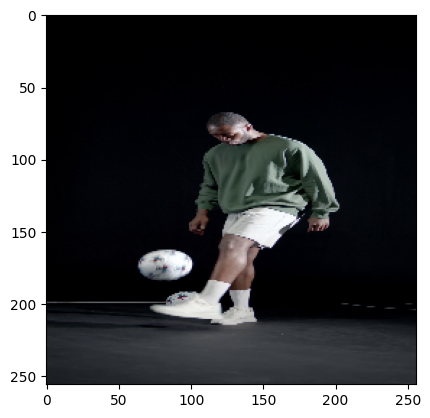

In [106]:
plt.imshow(t_frames[5])